In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

a) Data Collection, Cleaning and Merging

In [2]:
# Downloading dataset from Yahoo Finance
BTC = yf.download("BTC-USD", start='2024-04-10',end='2024-04-11', interval='1m')

LTC = yf.download("LTC-USD",start='2024-04-10',end='2024-04-11', interval='1m')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
# Aligning collected data closing prices sice their sizes are not equal
merged_data = pd.merge(BTC['Adj Close'], LTC['Adj Close'], how='outer', left_index=True, right_index=True)
merged_data.ffill(inplace=True)  # Forward-fill missing values (if any)
merged_data.bfill(inplace=True)  # Backward-fill any remaining missing values (if any)
merged_data

,Adj Close_x,Adj Close_y
Datetime,,
2024-04-10 00:00:00+00:00,69137.804688,97.499809
2024-04-10 00:01:00+00:00,69112.531250,97.525772
2024-04-10 00:02:00+00:00,69093.843750,97.517197
2024-04-10 00:03:00+00:00,69095.515625,97.494255
2024-04-10 00:04:00+00:00,69094.117188,97.448853
...,...,...
2024-04-10 23:54:00+00:00,70514.281250,96.658691
2024-04-10 23:55:00+00:00,70514.281250,96.668144
2024-04-10 23:56:00+00:00,70540.414062,96.670815


In [4]:
p1=merged_data.iloc[:,0]   # minutely closing prices of Bitcoin after aligning
p2=merged_data.iloc[:,1]   # minutely closing prices of Litecoin after aligning

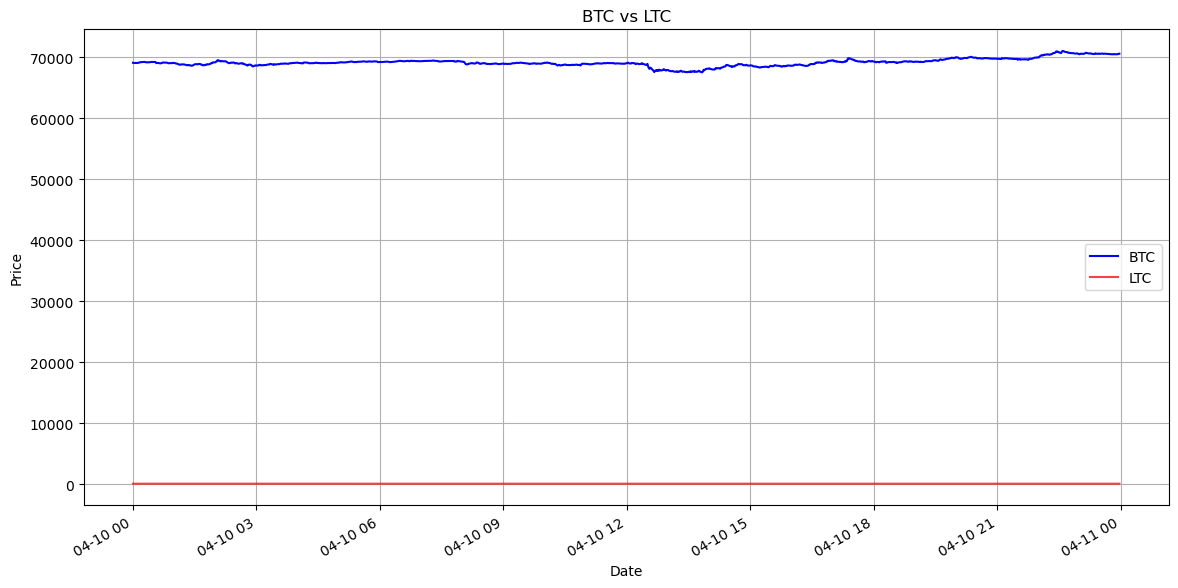

In [5]:
plt.figure(figsize=(14, 7))
p1.plot(label='BTC', color='blue')
p2.plot(label='LTC', color='red', alpha=0.75)
plt.title('BTC vs LTC')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

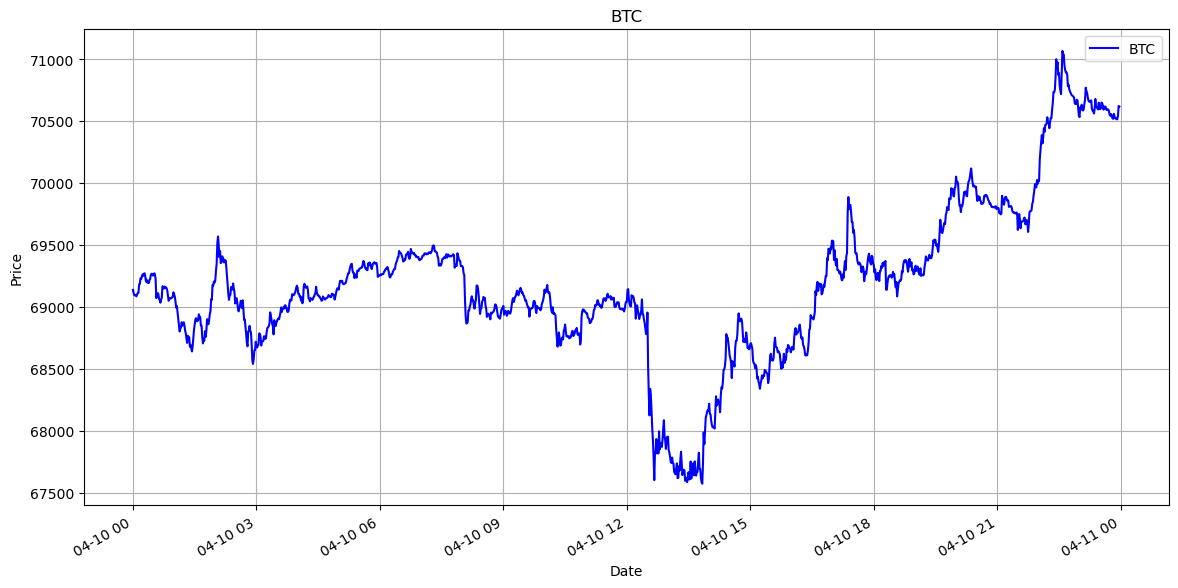

In [6]:
plt.figure(figsize=(14, 7))
p1.plot(label='BTC', color='blue')
plt.title('BTC')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

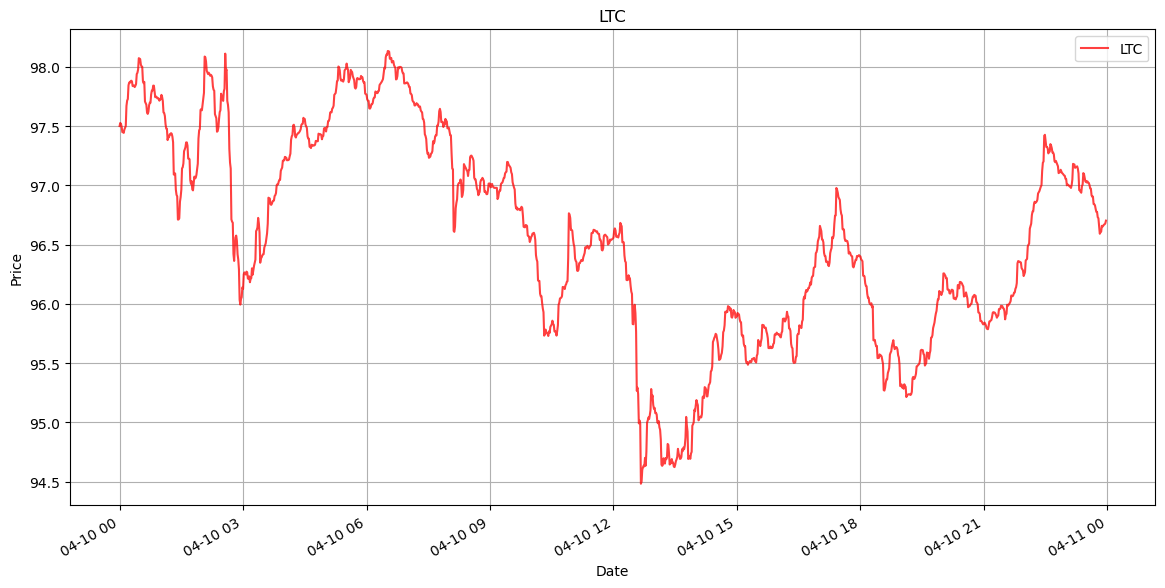

In [7]:
plt.figure(figsize=(14, 7))
p2.plot(label='LTC', color='red', alpha=0.75)
plt.title('LTC')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Estimating the Parameters (Assuming delta=1)

i) Stock Prices

In [8]:
S1_0 = BTC['Open'][0]
S2_0 = LTC['Open'][0]
print(f"S1_0) is: {S1_0}")
print(f"S2_0) is: {S2_0}")

S1_0) is: 69137.8046875
S2_0) is: 97.49980926513672


ii) Rho

In [9]:
r1=np.log(BTC['Adj Close']/BTC['Adj Close'].shift(1))
r2=np.log(LTC['Adj Close']/LTC['Adj Close'].shift(1)) 
rho=r1.corr(r2)
print(f"Correlation Coefficient (Rho) is: {rho:.4f}")

Correlation Coefficient (Rho) is: 0.2473


iii) Mean

In [10]:
mu_1 = r1.mean()*390
mu_2 = r2.mean()*390
print(f"The mean log returns of BTC is: {mu_1:.4f}")
print(f"The mean log returns of LTC is: {mu_2:.4f}")

The mean log returns of BTC is: 0.0059
The mean log returns of LTC is: -0.0022


iv) Standard Deviation

In [11]:
sigma_1 = r1.std()*np.sqrt(390)
sigma_2 = r2.std()*np.sqrt(390)
print(f"The standard deviation of BTC is: {sigma_1:.4f}")
print(f"The standard deviation of LTC is: {sigma_2:.4f}")

The standard deviation of BTC is: 0.0143
The standard deviation of LTC is: 0.0126


v) z

In [12]:
z_0 = 0
print(f'z_0: {z_0}')

z_0: 0


vi) Beta

In [13]:
from scipy.stats import linregress
result=linregress(np.log(p1),np.log(p2))
beta=result.slope
print(f"The Coefficient Beta is: {beta:.4f}")

The Coefficient Beta is: 0.4204


In [14]:
gamma = 0.5
delta=-1
rho=r1.corr(r2)
T=1
M=len(BTC['Adj Close'])

Evaluating "z"

In [15]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = S1[t-1] * np.exp((mu_1 + delta * z[t] - sigma_1 ** 2 / 2) * dt + sigma_1 * np.sqrt(dt) * rn1[t])
    S2[t] = S2[t-1] * np.exp((mu_2 - sigma_2 ** 2 / 2) * dt + sigma_2 * np.sqrt(dt) * (rho * rn1[t] + np.sqrt(1 - rho ** 2) * rn2[t]))

Text(0.5, 1.0, 'z')

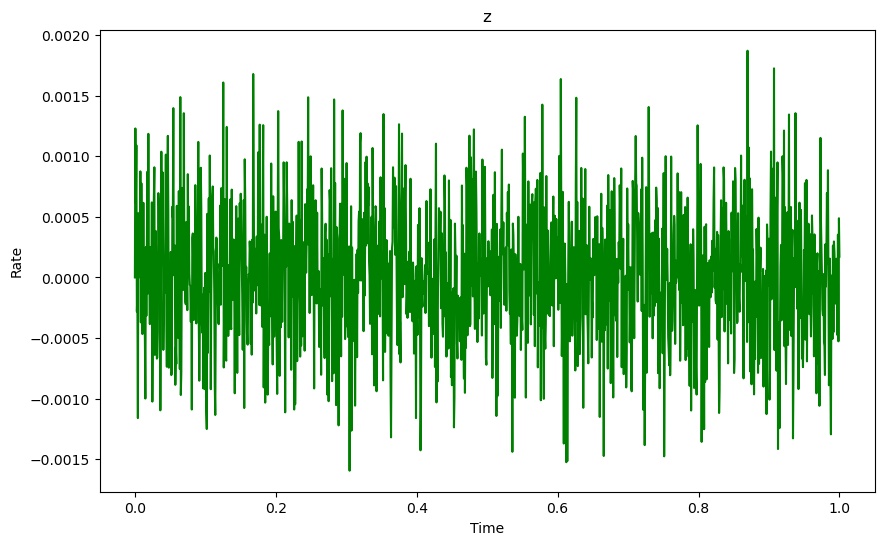

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

Optima Trading Weights

In [17]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Text(0.5, 1.0, 'Weights')

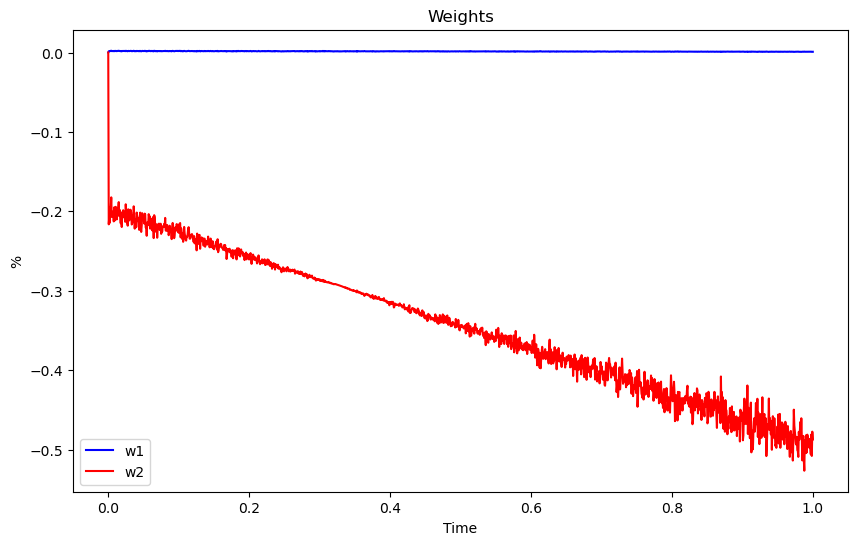

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Evaluating Optimal Wealth/Cash Process

Text(0.5, 1.0, 'Wealth')

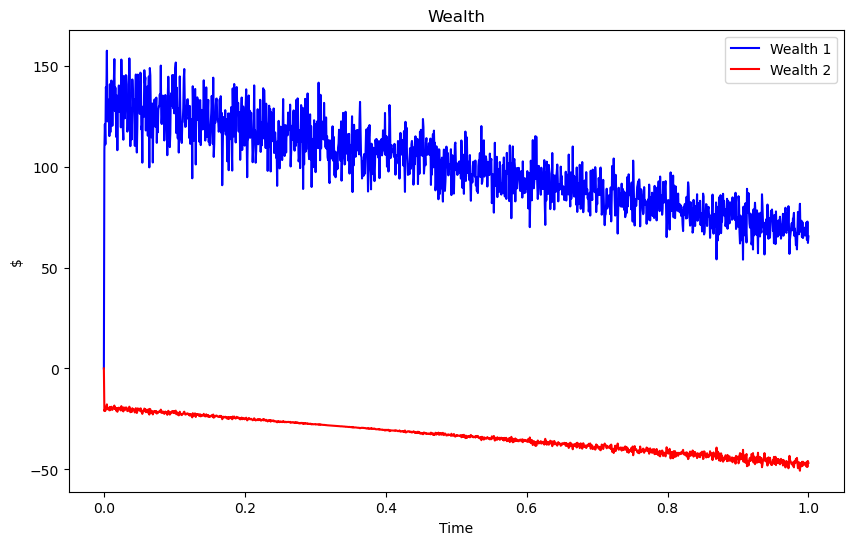

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

Compare the results with the static control pair

Text(0.5, 1.0, 'Comparison')

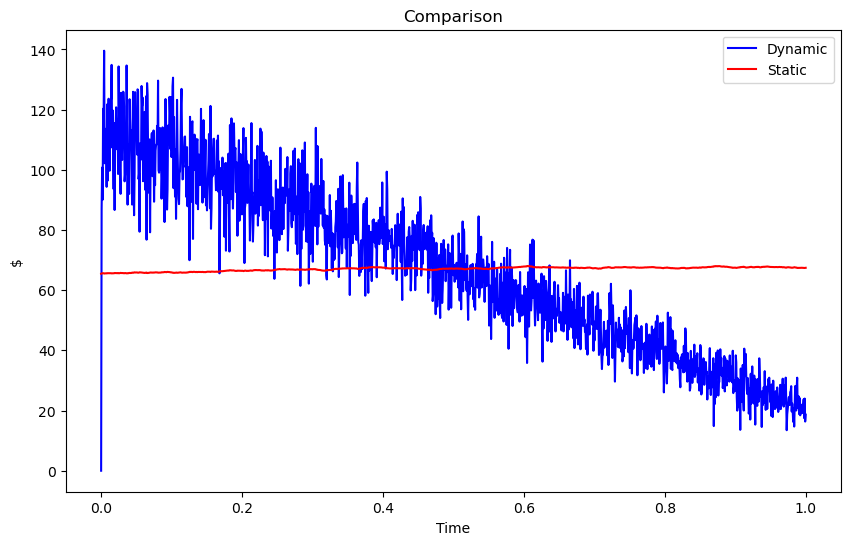

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')

Simulation of two assets (multiply all parameters by 1.5), redo the previous steps and show the two optimal control factors 

In [21]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [22]:
S1_0 = 103706
S2_0 = 146
mu_1 = 0.00885
mu_2 = 0.0033
sigma_1 = 0.02145
sigma_2 = 0.189
z_0 = 0.015
beta = 1
gamma = 0.75
delta = 1
phi = 0.01
rho = 0.37095
T = 1
M = 390

In [23]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [24]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = S1[t-1] * np.exp((mu_1 + delta * z[t] - sigma_1 ** 2 / 2) * dt + sigma_1 * np.sqrt(dt) * rn1[t])
    S2[t] = S2[t-1] * np.exp((mu_2 - sigma_2 ** 2 / 2) * dt + sigma_2 * np.sqrt(dt) * (rho * rn1[t] + np.sqrt(1 - rho ** 2) * rn2[t]))

Text(0.5, 1.0, 'Stock Price')

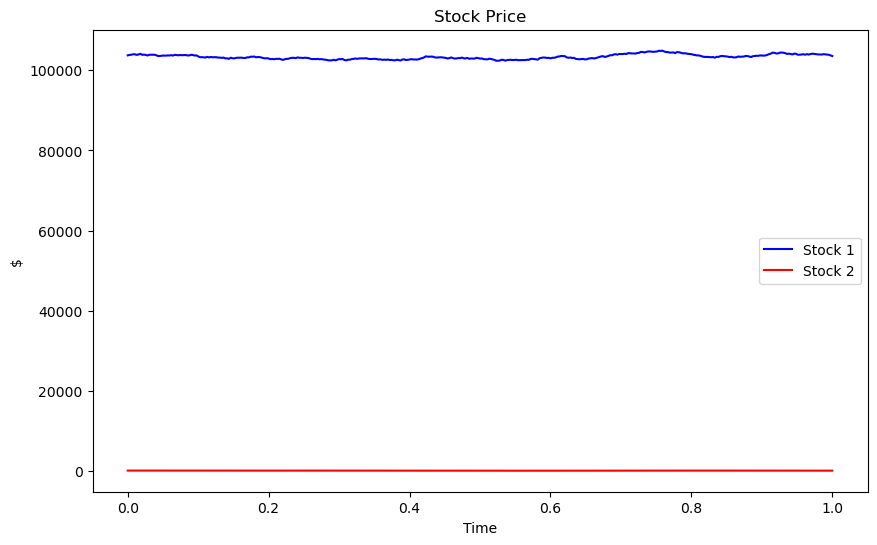

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='Stock 1')
plt.plot(tt, S2, 'r', lw=1.5, label='Stock 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

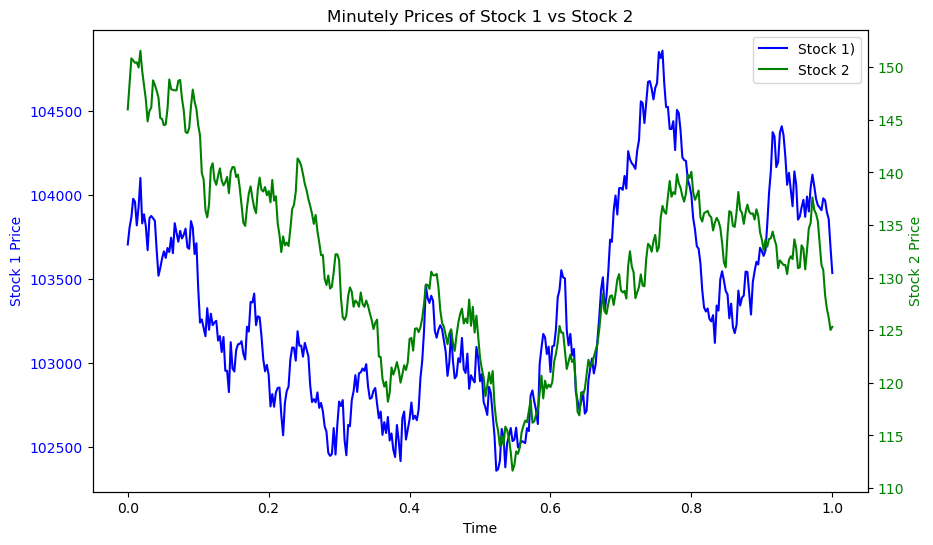

In [26]:
# Plotting minutely prices with different axis

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Stock 1 prices on the left axis
ax1.plot(tt, S1, color='blue', label='Stock 1)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Stock 1 Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for Stock 2 prices
ax2 = ax1.twinx()
ax2.plot(tt, S2, color='green', label='Stock 2')
ax2.set_ylabel('Stock 2 Price', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Minutely Prices of Stock 1 vs Stock 2')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
plt.show()

Text(0.5, 1.0, 'Alpha')

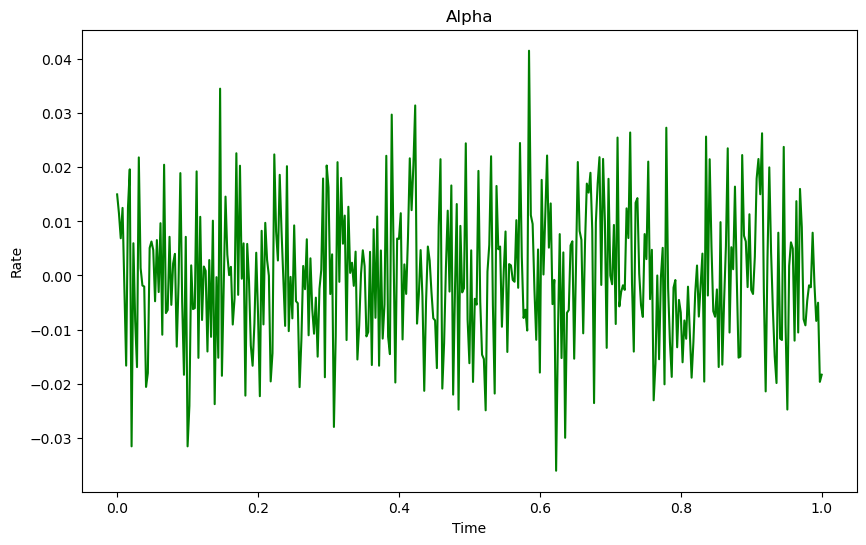

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Alpha')

In [28]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Text(0.5, 1.0, 'Weights')

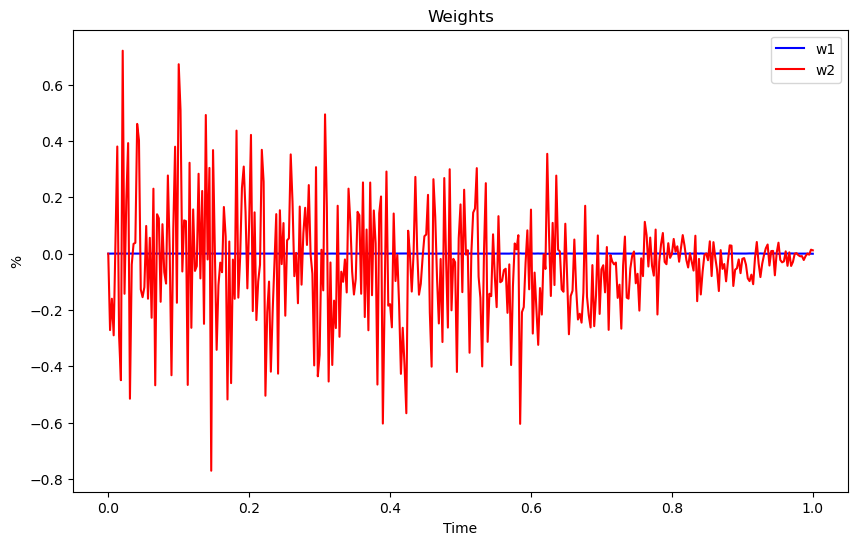

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Wealth')

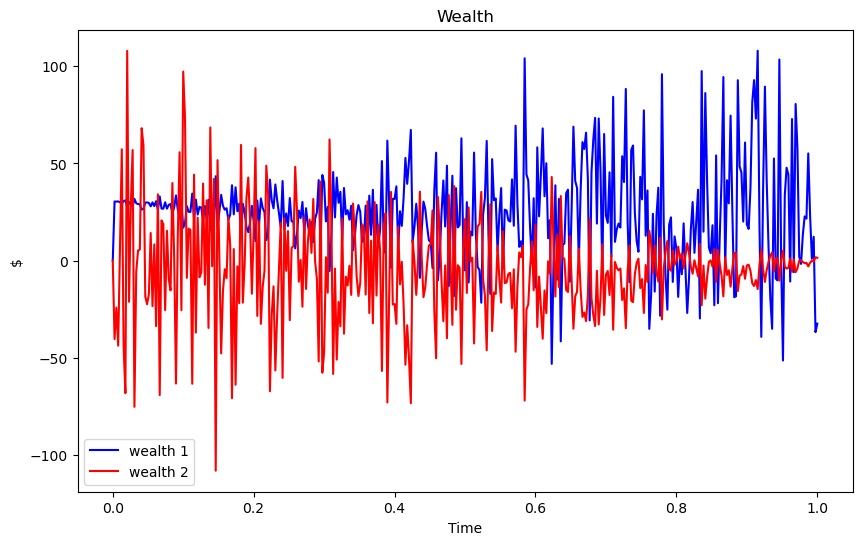

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [31]:
Pi_1.mean()

0.00023662414606958482

In [32]:
Pi_2.mean()

-0.03753846512439119

Text(0.5, 1.0, 'Comparison')

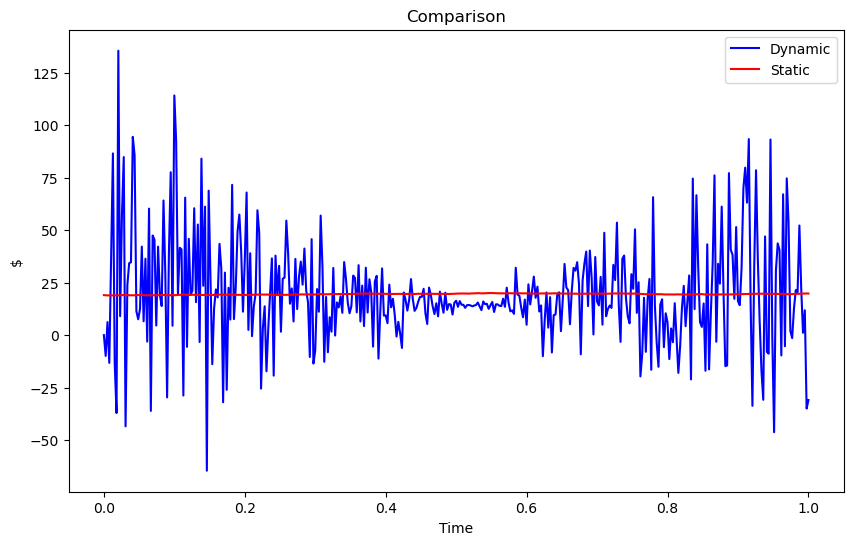

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')